Lecture 2: Numerical Quadrature
===


Often, we want to approximately compute definite integrals of the form

$$
\int_a^b f(x) dx.
$$

This process is called *(numerical) quadrature*.
We approxmate by a finite sum,

$$
\int_a^b f(x) dx \approx \sum_{n=1}^N w_n\, f(x_n).
$$

The choice of weights $w_n$ and evaluation points $x_n$ is called the *quadrature rule*.

Newton-Cotes quadrature
---
Newton-Cotes quadrature is a simple, classical scheme, but not very efficient.
It is not the recommended way of doing quadrature, but it serves as a good introduction,
and we can say many theoretical things about it that will remain valid later as well.

Here is the idea for (composite) Newton-Cotes:

* Subdivide the interval $[a,b]$ into $N$ sub-intervals of equal length
* On each sub-interval, approximate $f(x)$ by a polynomial of degree $p$
* Exactly compute the integrals of the polynomials
* Sum up the results

Rectangular rule
---

$$
I_N = \sum_{n=0}^{N-1} \Delta f(a + \Delta n)
$$

In [1]:
function rectangular_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.0
    for n=0:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

rectangular_rule (generic function with 1 method)

In [2]:
f(x) = x^2

# true value: I = 1/3 = 0.333333333
[rectangular_rule(f, 0, 1, N) 
        for N in [5, 10, 100, 1000, 10000, 100000]]

6-element Array{Float64,1}:
 0.24000000000000005
 0.2850000000000001 
 0.32835000000000014
 0.33283350000000034
 0.33328333499999957
 0.33332833334999745

Trapezoid rule
---

$$
        I_N = \frac{1}{2}\Delta f(a) + \sum_{n=1}^{N-1}\Delta f(a + \Delta n) +  \frac{1}{2}\Delta f(b)
$$

In [3]:
function trapezoid_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.5*Δ*f(a) + 0.5*Δ*f(b)
    for n=1:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

trapezoid_rule (generic function with 1 method)

In [4]:
f(x) = x^2

# true value: I = 1/3 = 0.333333333
[trapezoid_rule(f, 0, 1, N) 
        for N in [5, 10, 100, 1000, 10000, 100000]]

6-element Array{Float64,1}:
 0.3400000000000001 
 0.3350000000000001 
 0.33335000000000015
 0.3333335000000003 
 0.3333333349999995 
 0.33333333334999743

Compare rectangular and trapezoid rule: The trapezoid rule achieves significantly more correct digits at the same $N$!

Simpson's rule
---

Set $h=\Delta/2$.

$$
    I_N = \frac{1}{3}\left( h f(a) + 2 h\sum_{n=1}^{N-1} f(a + 2n\, h) + 4h \sum_{n=1}^N f(a + (2n-1) h) + 
    h f(b)\right)
$$

In [5]:
function simpson_rule(f, a, b, N)
    Δ = (b - a)/N
    h = Δ/2
    
    I = h*f(a)/3 + h*f(b)/3
    for n=1:N-1
        I += h*( 2*f(a + 2*n*h) + 4*f(a+ (2*n-1)*h))/3
    end
    I += 4*h*f(a+ (2*N-1)*h)/3
    
    return I
end

simpson_rule (generic function with 1 method)

In [6]:
f(x) = x^2

# true value: I = 1/3 = 0.333333333
[simpson_rule(f, 0, 1, N) 
        for N in [1, 5, 10, 100, 1000, 10000]]

6-element Array{Float64,1}:
 0.3333333333333333 
 0.3333333333333334 
 0.33333333333333337
 0.3333333333333334 
 0.33333333333333326
 0.3333333333333337 

Perfect agreement already for $N=1$, because our function is already a quadratic polynomial!

In [7]:
f(x) = x^4

# true value: I = 1/5 = 0.2
[simpson_rule(f, 0, 1, N) 
        for N in [1, 5, 10, 100, 1000, 10000]]

6-element Array{Float64,1}:
 0.20833333333333331
 0.20001333333333335
 0.2000008333333334 
 0.20000000008333335
 0.2000000000000083 
 0.19999999999999998

Error analysis
---

We consider the integral

$$
I = \int_1^2 \log^2(x)\, dx = 2 (\log(2) - 1)^2,
$$

and compute the relative errors for our various quadrature rules,

$$
    \mathcal{E}_N = \left|\frac{I_{quad}(N) - I_{exact}}{I_{exact}}\right|,
$$

where $N$ is the number of subdivisions of the interval.

In [8]:
f(x) = log(x)^2

exact = 2*(log(2) - 1)^2

0.18831730559662163

In [9]:
using PyPlot
PyPlot.svg(true)

# analyze errors
Ns = [1, 10, 100, 1000, 10000, 100000]
rect_error = [(rectangular_rule(f, 1, 2, N) - exact)/exact
        for N in Ns]

trap_error = [(trapezoid_rule(f, 1, 2, N) - exact)/exact
        for N in Ns]

simps_error = [(simpson_rule(f, 1, 2, N) - exact)/exact
        for N in Ns]

6-element Array{Float64,1}:
  0.007219194827661043  
  1.0265811188747152e-6 
  1.031855405735965e-10 
  1.1054046066436037e-14
 -2.9477456177162764e-16
  3.537294741259532e-15 

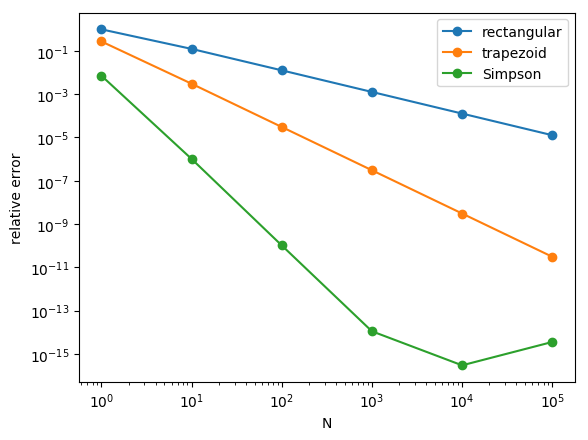

PyObject <matplotlib.legend.Legend object at 0x7f9b345369b0>

In [10]:
figure()

loglog(Ns, abs.(rect_error), "o-", label="rectangular")
loglog(Ns, abs.(trap_error), "o-", label="trapezoid")
loglog(Ns, abs.(simps_error), "o-", label="Simpson")

xlabel("N")
ylabel("relative error")
legend()

We still need *a lot* of function evaluations for good accuracy,
so better methods are required.

Later in this class, we will discuss the *Clenshaw-Curtis* method,
which will provide significantly better accuracy at much fewer function
evaluations.